In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [38]:
mit_test_data = pd.read_csv('mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('mitbih_train.csv', header=None)
print(mit_train_data.shape)
print(mit_test_data.shape
     )

(87554, 188)
(21892, 188)


In [34]:
mit_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
x_train, y_train = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]
y_train

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6019    0.0
6020    0.0
6021    0.0
6022    0.0
6023    NaN
Name: 187, Length: 6024, dtype: float64

In [36]:
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]
mit_test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,1.000000,0.729537,0.533808,0.227758,0.110320,0.096085,0.188612,0.209964,0.234875,0.231317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6913,0.035533,0.040609,0.218274,0.355330,0.502538,0.659898,0.710660,0.751269,0.756345,0.766497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6914,0.987768,0.856269,0.449541,0.009174,0.073394,0.207951,0.324159,0.373089,0.394495,0.422018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6915,0.000000,0.085859,0.181818,0.378788,0.494949,0.606061,0.696970,0.732323,0.772727,0.752525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1=pd.read_csv('mitbih_train.csv',header=None)
df2=pd.read_csv('mitbih_test.csv',header=None)

In [41]:
df=pd.concat([df1,df2],ignore_index=True,sort=False)
df[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

In [11]:
df[187]=df[187].astype(int)
df[187].value_counts()

0    90589
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64

In [42]:
df.isnull().sum().sum()

0

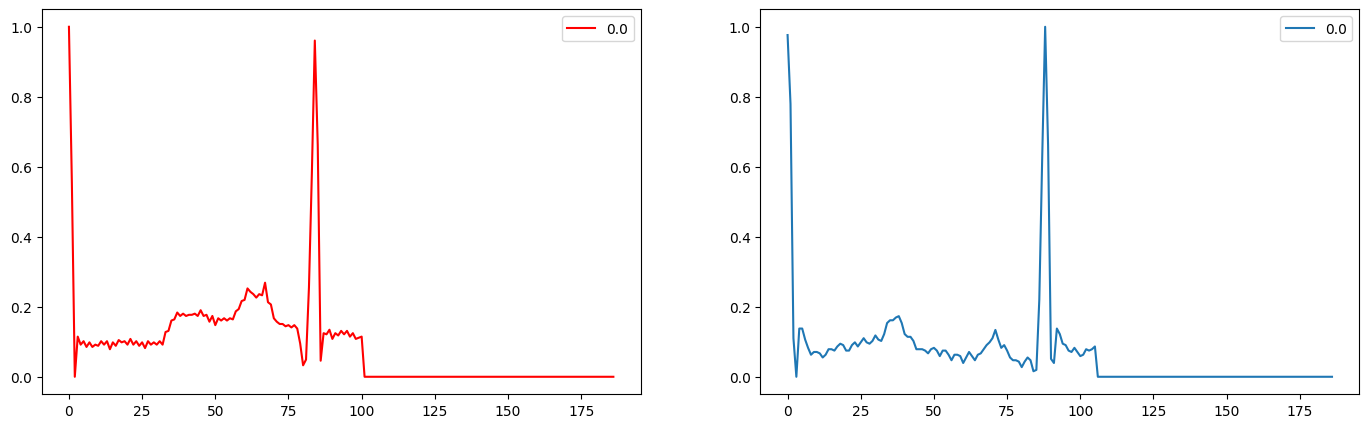

In [43]:
plt.figure(figsize=(17,5))
plt.subplot(121)
test_row_1=np.array(df.iloc[np.random.randint(0,len(df))])
plt.plot(test_row_1[:-1],label=test_row_1[-1],color='r')
plt.legend()

plt.subplot(122)
test_row_2=np.array(df.iloc[np.random.randint(0,len(df))])
plt.plot(test_row_2[:-1],label=test_row_2[-1])
plt.legend()

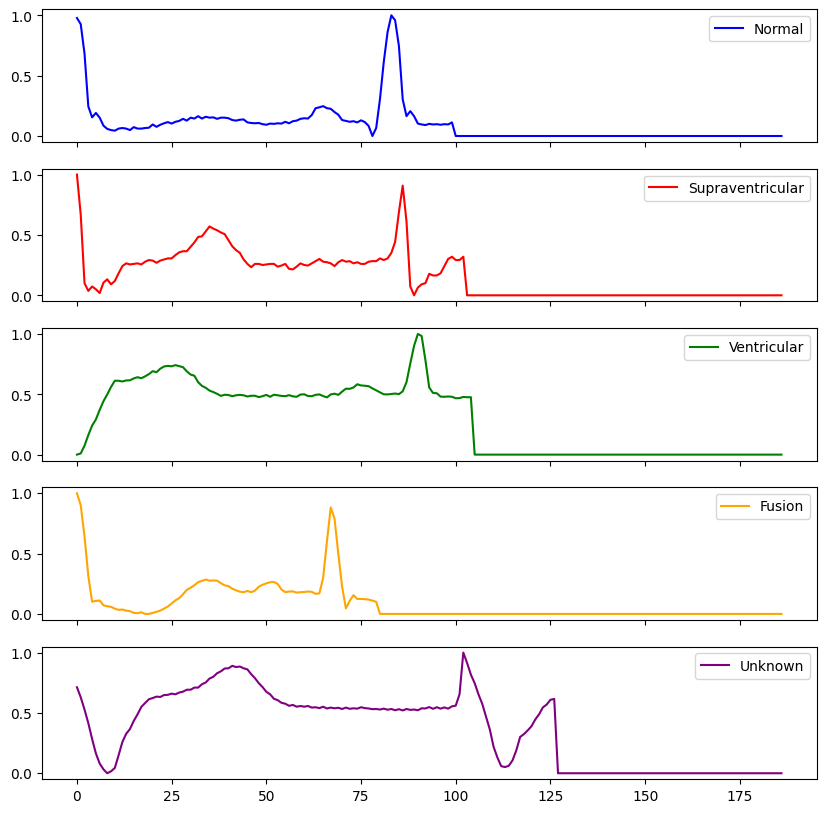

In [44]:
# plot ECG data belonging to each class label
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]
color = ['blue','red','green','orange','purple']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(10,10))
for i, row in enumerate(ax):
    row.plot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend()

([<matplotlib.patches.Wedge at 0x7ff50259f460>,
 [Text(-0.9427544126347679, 0.5667575473319026, 'Normal'),
  Text(0.7244876615439377, -0.8277183266489857, 'Unknown'),
  Text(1.0073606227948213, -0.4418422519886819, 'Ventricular'),
  Text(1.0912977987617831, -0.13809096428690254, 'Supraventricular'),
  Text(1.0997078011098815, -0.02535255762382736, 'Fusion')],
 [Text(-0.5142296796189643, 0.30914048036285596, '82.8%'),
  Text(0.39517508811487506, -0.45148272362671943, '7.3%'),
  Text(0.549469430615357, -0.24100486472109917, '6.6%'),
  Text(0.5952533447791544, -0.07532234415649228, '2.5%'),
  Text(0.599840618787208, -0.013828667794814923, '0.7%')])

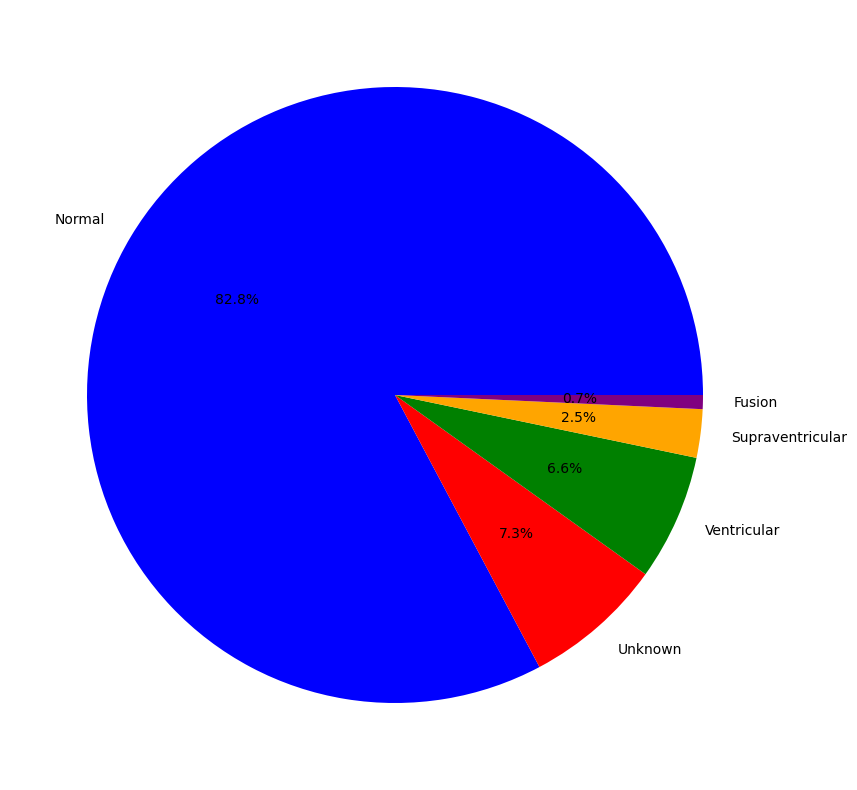

In [45]:
plt.figure(figsize=(10,10))
plt.pie(df[187].value_counts(), labels = ["Normal","Unknown","Ventricular","Supraventricular","Fusion"],colors= ['blue','red','green','orange','purple'],autopct='%2.1f%%')

In [46]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82084, 187)
(82084,)
(27362, 187)
(27362,)


In [49]:
import tensorflow as tf

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model=Sequential()

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [29]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy' )
history=model.fit(X_train,y_train,epochs=5,validation_split=0.2,batch_size=64)

Epoch 1/5


/home/u191682/.local/lib/python3.9/site-packages/keras/engine/data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1027/1027 [==============================] - 5s 4ms/step - loss: 0.0311 - val_loss: 0.0899
Epoch 2/5
1027/1027 [==============================] - 4s 4ms/step - loss: 0.0287 - val_loss: 0.0838
Epoch 3/5
1027/1027 [==============================] - 4s 4ms/step - loss: 0.0277 - val_loss: 0.0903
Epoch 4/5
1027/1027 [==============================] - 4s 4ms/step - loss: 0.0258 - val_loss: 0.0966
Epoch 5/5
1027/1027 [==============================] - 4s 4ms/step - loss: 0.0267 - val_loss: 0.1115


In [30]:
y_prob=model.predict(X_test)
y_pred=np.argmax(y_prob,axis=1)
y_pred

856/856 [==============================] - 1s 1ms/step


array([0, 4, 0, ..., 0, 0, 0])

In [31]:
print("Accuracy with ANN is:", accuracy_score(y_test,y_pred))

Accuracy with ANN is: 0.9809224471895329


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22592
           1       0.95      0.69      0.80       701
           2       0.96      0.93      0.95      1789
           3       0.80      0.79      0.80       194
           4       1.00      0.96      0.98      2086

    accuracy                           0.98     27362
   macro avg       0.94      0.87      0.90     27362
weighted avg       0.98      0.98      0.98     27362

